# Preprocesamiento

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats.stats as st
from __future__ import division

pc_name='nico'
 
def getInverse(arreglo):
    salida = []
    for elemento in arreglo:
        try:
            salida.append([1/elemento])
        except ZeroDivisionError:
            print "error"
    
    return salida

def Beyond1std(arreglo, weigth_mean, standar_dev):
    numerator = 0
    denominator = len(arreglo)
    for elemento in arreglo:
        if abs(elemento-weigth_mean) >= standar_dev:
            numerator += 1
    return numerator/denominator

def slope_trend(arreglo):
    N = len(arreglo) - 1
    for i in range(N):
        num = 0
        if (arreglo[i+1]-arreglo[i]) >= 0:
            num += 1
        
    return num/N
           
#### directory debe terminar en "/", o filename empezar en "/"
def features (directory, filename):  
    date, Red_m_0 , Red_err_0 , Blue_m_0 , Blue_err_0 = np.loadtxt(directory+filename+'.time', usecols=(0, 1, 2, 3, 4), unpack=True)
    period = np.genfromtxt(directory+filename+'.dat')
    label = ID_labels [filename]
    
    
    ### Eliminar spikes
    ### RED
    index_R = Red_m_0 < 99.999
    Date_red = date[index_R]
    Red_m = Red_m_0[index_R]
    Red_err = Red_err_0[index_R]
    ### BLUE
    index_B = Blue_m_0 < 99.999
    Date_blue = date[index_B]
    Blue_m = Blue_m_0[index_B]
    Blue_err = Blue_err_0[index_B]

    ### Features
    Red_len = len(Red_m)
    Blue_len = len(Blue_m)
    
    ### Promedios
    Red_mean = np.mean(Red_m)
    Blue_mean = np.mean(Blue_m)

    ###Standar Deviation
    Red_std = np.std(Red_m)
    Blue_std = np.std(Blue_m)
    

    ### Magnitude Ratio
    max_R = max(Red_m)
    min_R = min(Red_m)
    Red_MagRatio = (max_R - np.median(Red_m))/(max_R - min_R)

    max_B = max(Blue_m)
    min_B = min(Blue_m)
    Blue_MagRatio = (max_B - np.median(Blue_m))/(max_B - min_B)

    ### Amplitud
    Red_amplitude = (max_R - min_R)*0.5
    Blue_amplitude = (max_B - min_B)*0.5
    
    ### Skew
    Red_skew = st.skew(Red_m)
    Blue_skew = st.skew(Blue_m)
    
    ### Eta
    Red_m_square = np.power(Red_m, 2)
    Red_err_square = np.power(Red_err, 2)
    Red_eta = 0
    for j in range(Red_len-1):
        Red_eta += (Red_m_square[j+1]/Red_err_square[j+1])-(Red_m_square[j]/Red_err_square[j])
    
    Red_eta = Red_eta/(Red_len-1)

    Blue_m_square = np.power(Blue_m, 2)
    Blue_err_square = np.power(Blue_err, 2)
    Blue_eta = 0
    
    for j in range(Blue_len-1):
        Blue_eta += (Blue_m_square[j+1]/Blue_err_square[j+1])-(Blue_m_square[j]/Blue_err_square[j])
    Blue_eta = Blue_eta/(Blue_len-1)
    
    ##Weigthed mean
    #Red_Wmean = np.sum(np.inner(Red_m, getInverse(Red_err_square)))/np.sum(getInverse(Red_err_square))
    #Blue_Wmean = np.sum(np.inner(Blue_m, getInverse(Blue_err_square)))/np.sum(getInverse(Blue_err_square))
    
    ##Beyond1std
    Red_B1std = Beyond1std(Red_m, Red_mean, Red_std)
    Blue_B1std = Beyond1std(Blue_m, Blue_mean, Blue_std)
    
    ##Slope_trend
    Red_slope_trend = slope_trend(Red_m)
    Blue_slope_trend = slope_trend(Blue_m)
    
    ##B-R
    B_R = Blue_mean - Red_mean
    
    return np.array([[label, Red_mean, Red_std, Red_MagRatio, Red_amplitude, Red_skew, Red_eta, Red_B1std, Red_slope_trend,
                      Blue_mean, Blue_std, Blue_MagRatio, Blue_amplitude, Blue_skew, Blue_eta, Blue_B1std, Blue_slope_trend, B_R, period]])



# Diccionario con labels

In [2]:
ID_labels = {}

direccion_ceph = 'CEPH_catalog_crossmatch_eros_ogle.csv'
etiquetas_ceph = np.genfromtxt(direccion_ceph, 'string', delimiter=',')

direccion_RRL = 'RRL_catalog_crossmatch_eros_ogle.csv'
etiquetas_RRL = np.genfromtxt(direccion_RRL, 'string', delimiter=',')

direccion_EB = 'EB_catalog_crossmatch_eros_ogle.csv'
etiquetas_EB = np.genfromtxt(direccion_EB, 'string', delimiter=',')

ogle_id_ceph = etiquetas_ceph[1:len(etiquetas_ceph), 1]
labels_ceph = etiquetas_ceph[1:len(etiquetas_ceph), 4]

ogle_id_RRL = etiquetas_RRL[1:len(etiquetas_RRL), 1]
labels_RRL = etiquetas_RRL[1:len(etiquetas_RRL), 4]

ogle_id_EB = etiquetas_EB[1:len(etiquetas_EB), 1]
labels_EB = etiquetas_EB[1:len(etiquetas_EB), 4]


for indice in range(len(ogle_id_ceph)):
    ID_labels[ ogle_id_ceph[indice] ] = labels_ceph[indice]
    
for indice in range(len(ogle_id_RRL)):
    ID_labels[ ogle_id_RRL[indice] ] = labels_RRL[indice]

for indice in range(len(ogle_id_EB)):
    ID_labels[ ogle_id_EB[indice] ] = labels_EB[indice]

# Creación de base de datos con características

In [3]:
import os

N_features = 9   ## EN EL FUTURO CONSIDERAR QUE SE DEBE INCLUIR EL LABEL

names = []
row_counter = 0
directory1 = 'dataset/'
stars_not_found = 0

clases = os.listdir(directory1)

#directory2 = directory1+clases[1]+"/"
#subclases = os.listdir(directory2)

for clase in clases:
    directory2 = directory1+clase+"/"
    subclases = os.listdir(directory2)

    for carpeta in subclases:
        directory=directory2+carpeta+"/"
        for name in os.listdir(directory):
            if name.endswith(".time"):
                name_2 = (os.path.splitext(name)[0])
                if row_counter == 0 :
                    features_matrix = features(directory,name_2)
                else:
                    try:
                        features_matrix = np.concatenate((features_matrix, features(directory, name_2)), axis = 0)
                    except KeyError:
                        stars_not_found += 1
                row_counter += 1

print "Estrellas no encontradas en el cross-match:"
print stars_not_found

import pickle
pickle.dump( features_matrix , open( "caracteristicas.p", "wb" ) )


IOError: dataset/RRL/RRab/lm0010k25441.dat not found.

# Separabilidad clases (EB, Cefeidas, RR Lyrae)

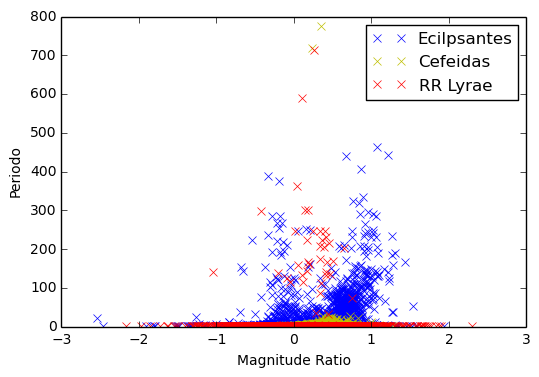

In [38]:
import pickle
caracteristicas = pickle.load( open( "caracteristicas.p", "rb" ) )

feature_1 = 17
feature_2 = 18

RR_feature_1 = []
RR_feature_2 = []

EB_feature_1 = []
EB_feature_2 = []

Ceph_feature_1 = []
Ceph_feature_2 = []

for j in range(len(caracteristicas[:,0])):
    if caracteristicas[j,0][0] == 'R':
        RR_feature_1.append(caracteristicas[j,feature_1])
        RR_feature_2.append(caracteristicas[j,feature_2])

    elif caracteristicas[j,0][0] == 'E':
        EB_feature_1.append(caracteristicas[j,feature_1])
        EB_feature_2.append(caracteristicas[j,feature_2])
    else:
        Ceph_feature_1.append(caracteristicas[j,feature_1])
        Ceph_feature_2.append(caracteristicas[j,feature_2])

        #[label, Red_mean, Red_std, Red_MagRatio, Red_amplitude, Blue_mean, Blue_std, 
        #Blue_MagRatio, Blue_amplitude, period]

p1, = plt.plot(EB_feature_1, EB_feature_2 , 'x', color='b')
p2, = plt.plot(Ceph_feature_1, Ceph_feature_2 , 'x', color='y') ##g^
p3, = plt.plot(RR_feature_1, RR_feature_2 , 'x', color='r')
#plt.axis([0,1, 0, 10])
plt.xlabel("Magnitude Ratio")
plt.ylabel("Periodo")

plt.legend([ p1, p2, p3], ["Ecilpsantes" ,"Cefeidas", "RR Lyrae"])
            

# RR Lyrae Subclases

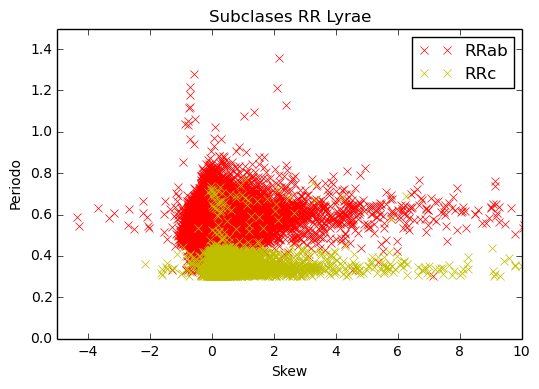

In [205]:
import pickle
caracteristicas = pickle.load( open( "caracteristicas.p", "rb" ) )

feature_1 = 13
feature_2 = 18

RRab_feature_1 = []
RRab_feature_2 = []


RRc_feature_1 = []
RRc_feature_2 = []
counter = 0
RRab= 0
RRc = 0
for j in range(len(caracteristicas[:,0])):
    if caracteristicas[j,0][0] == 'R':
        if caracteristicas[j,0] == "RRab":
            RRab_feature_1.append(caracteristicas[j,feature_1])
            RRab_feature_2.append(caracteristicas[j,feature_2])
            RRab += 1
            
        elif caracteristicas[j,0] == "RRc":
            RRc_feature_1.append(caracteristicas[j,feature_1])
            RRc_feature_2.append(caracteristicas[j,feature_2])
        else:
            counter += 1

ab, = plt.plot(RRab_feature_1, RRab_feature_2 , 'x', color='r')
c, = plt.plot(RRc_feature_1, RRc_feature_2 , 'x', color='y') 
plt.axis([-5,10, 0, 1.5])
plt.xlabel("Skew")
plt.ylabel("Periodo")
plt.legend([ ab, c], ["RRab","RRc"])
plt.title("Subclases RR Lyrae")
        #[label, Red_mean, Red_std, Red_MagRatio, Red_amplitude, Blue_mean, Blue_std, 
        #Blue_MagRatio, Blue_amplitude, period]
            

In [6]:
subclass = []
for ide in ID_labels:
    label_verify = ID_labels[ide]
    if not (label_verify in subclass):
        subclass.append(label_verify)

RRL_subclases = []
Cefeids_subclases = []
EB_subclases = []

for element in subclass:
    if element[0] == "R":
        RRL_subclases.append(element)   
    elif element[0] == "E":
        EB_subclases.append(element)
    else:
        Cefeids_subclases.append(element)   
        

['RRab', 'ESD', 'RRc', 'ED', 'EC', 'RRd', 'ED_ESD', '1', 'F', 'RRe', '12', 'ELL_EC', 'ESD_DPV', 'ED_VAR', 'F1', 'F12', '2', '13', 'ED_TEB', '123']
['RRab', 'RRc', 'RRd', 'RRe']
['1', 'F', '12', 'F1', 'F12', '2', '13', '123']
['ESD', 'ED', 'EC', 'ED_ESD', 'ELL_EC', 'ESD_DPV', 'ED_VAR', 'ED_TEB']


8


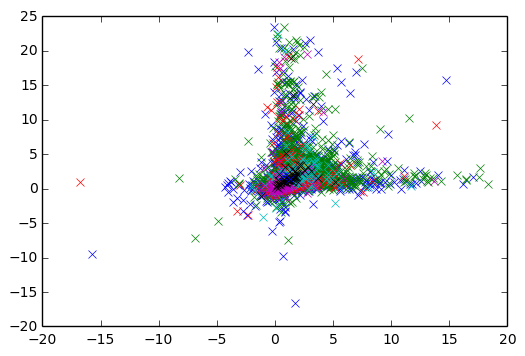

In [34]:
import pickle
caracteristicas = pickle.load( open( "caracteristicas.p", "rb" ) )

def list_of_lists(size):
    new_list=[]
    for i in range(size):
        new_list.append([])
    return new_list

feature_1 = 5
feature_2 = 13 

subclases=EB_subclases
#def sub_class_features(caracteristicas, subclases, feature_1, feature_2):

size_subclases = len(subclases)
subclases_features_2= list_of_lists(size_subclases)
subclases_features_1 = list_of_lists(size_subclases)
c = 0
for j in range(len(caracteristicas[:,0])):
    clase = caracteristicas[j,0]
    if clase in subclases:
        c += 1
        for i in range(len(subclases)):
            if clase == subclases[i]:
                subclases_features_1[i].append(caracteristicas[j,feature_1])
                subclases_features_2[i].append(caracteristicas[j,feature_2])
    
#    return [subclases_features_1, subclases_features_2, c]

print len(subclases_features_1)
#subclases=Cefeids_subclases
#results = sub_class_features(caracteristicas, subclases, feature_1, feature_2)
#print results[2]

ft1 = subclases_features_1
ft2 = subclases_features_2

a, = plt.plot(ft1[0], ft2[0] , 'x')
b, = plt.plot(ft1[1], ft2[1] , 'x')
c, = plt.plot(ft1[2], ft2[2] , 'x')
d, = plt.plot(ft1[3], ft2[3] , 'x')
e, = plt.plot(ft1[4], ft2[4] , 'x')
f, = plt.plot(ft1[5], ft2[5] , 'x')
g, = plt.plot(ft1[6], ft2[6] , 'x')
h, = plt.plot(ft1[7], ft2[7] , 'x')

#plt.axis([0,1, 0, 1.5])

#plt.xlabel("Skew")
#plt.ylabel("Periodo")
#plt.legend([ ab, c], ["RRab","RRc"])
#plt.title("Subclases RR Lyrae")
        #[label, Red_mean, Red_std, Red_MagRatio, Red_amplitude, Blue_mean, Blue_std, 
        #Blue_MagRatio, Blue_amplitude, period]

In [41]:
print len(caracteristicas[:,1])

27181
